# Ciencia de Datos 

## Objetivo del reto



### Actividad 1

Utilizando la API de DENUE, extraer datos de su estado y visualizar el top 10 de Clases de actividades económicas

Para hacer esto se necesita:
1. Obtener el token del inegi
2. Hacer la llamada a la api, haciendo una consulta al endpoint BuscarEntidad, con los datos necesarios (numero del estado, registro de inicio, registro final, token)
3. Transformar la respuesta de la API en un dataframe
4. Separar la columna ubicacion en 3 columnas (localidad, municipio, estado)
5. Hacer una grafica bar char sobre cuantos establecimientos hay por clase de actividad economica

*#HappyCoding*



In [81]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json


# Actividad 1

In [82]:

# Llamado al API
url='https://www.inegi.org.mx/app/api/denue/v1/consulta/BuscarEntidad/todos/15/0/50000/ba9e763c-9e67-4ece-a878-1df34a4d0e0f?type=json'
response= requests.get(url)

if response.status_code==200:
    content= json.loads(response.content)
#conviertiendo del contenido del json a dataframe
data= pd.DataFrame(content)
data.tail()


,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Ubicacion,Telefono,Correo_e,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local
49995,15109811192001002001000000U1,2278559,AUTOLAVADO CINTYA Y FANNY,,Lavado y lubricado de automóviles y camiones,0 a 5 personas,PRIVADA,BOSQUE DE CIPRESES,0,0,...,"FUENTES DEL VALLE, Tultitlán, MÉXICO ...",,,,Fijo,-99.13639401,19.61857086,,,
49996,15033811192001962000000000U8,1973323,AUTOLAVADO CIRCUNVALACION,,Lavado y lubricado de automóviles y camiones,0 a 5 personas,CALLE,CIRCUNVALACION ORIENTE,320,,...,"ECATEPEC DE MORELOS, Ecatepec de Morelos, MÉXI...",,,,Fijo,-99.04153438,19.54133185,,,
49997,15122811192000401000000000U9,2367585,AUTOLAVADO CLASICOS,,Lavado y lubricado de automóviles y camiones,0 a 5 personas,AVENIDA,MOCTEZUMA,0,0,...,"XICO, Valle de Chalco Solidaridad, MÉXICO ...",,,,Fijo,-98.95136231,19.27404033,,,
49998,15060811192000081000000000U1,2402232,AUTOLAVADO CLEAN,,Lavado y lubricado de automóviles y camiones,0 a 5 personas,CALLE,ATIZAPAN,,,...,"CIUDAD NICOLÁS ROMERO, Nicolás Romero, MÉXICO ...",,,,Fijo,-99.29975126,19.61479375,,,
49999,15106811192002271000000000U7,2436832,AUTOLAVADO CLEAN,,Lavado y lubricado de automóviles y camiones,0 a 5 personas,CALLE,JOSE LUIS SOLORZANO,208,,...,"TOLUCA DE LERDO, Toluca, MÉXICO ...",,,,Fijo,-99.64344099,19.27488001,,,


In [83]:
#dividiendo la columna ubicacion en las 3 columnas Localidad, Municipio y Estado
ubicacion=['Localidad','Municipio','Estado']
data[ubicacion]=data.Ubicacion.str.split(',', expand=True)
data.drop(['Ubicacion'], axis=1, inplace=True)
#Comprovando que se haya dividido correctamente
data.tail()

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local,Localidad,Municipio,Estado
49995,15109811192001002001000000U1,2278559,AUTOLAVADO CINTYA Y FANNY,,Lavado y lubricado de automóviles y camiones,0 a 5 personas,PRIVADA,BOSQUE DE CIPRESES,0,0,...,,Fijo,-99.13639401,19.61857086,,,,FUENTES DEL VALLE,Tultitlán,MÉXICO
49996,15033811192001962000000000U8,1973323,AUTOLAVADO CIRCUNVALACION,,Lavado y lubricado de automóviles y camiones,0 a 5 personas,CALLE,CIRCUNVALACION ORIENTE,320,,...,,Fijo,-99.04153438,19.54133185,,,,ECATEPEC DE MORELOS,Ecatepec de Morelos,MÉXICO
49997,15122811192000401000000000U9,2367585,AUTOLAVADO CLASICOS,,Lavado y lubricado de automóviles y camiones,0 a 5 personas,AVENIDA,MOCTEZUMA,0,0,...,,Fijo,-98.95136231,19.27404033,,,,XICO,Valle de Chalco Solidaridad,MÉXICO
49998,15060811192000081000000000U1,2402232,AUTOLAVADO CLEAN,,Lavado y lubricado de automóviles y camiones,0 a 5 personas,CALLE,ATIZAPAN,,,...,,Fijo,-99.29975126,19.61479375,,,,CIUDAD NICOLÁS ROMERO,Nicolás Romero,MÉXICO
49999,15106811192002271000000000U7,2436832,AUTOLAVADO CLEAN,,Lavado y lubricado de automóviles y camiones,0 a 5 personas,CALLE,JOSE LUIS SOLORZANO,208,,...,,Fijo,-99.64344099,19.27488001,,,,TOLUCA DE LERDO,Toluca,MÉXICO


In [84]:
#revizando las columnas y como estan guardadas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CLEE                      50000 non-null  object
 1   Id                        50000 non-null  object
 2   Nombre                    50000 non-null  object
 3   Razon_social              50000 non-null  object
 4   Clase_actividad           50000 non-null  object
 5   Estrato                   50000 non-null  object
 6   Tipo_vialidad             50000 non-null  object
 7   Calle                     50000 non-null  object
 8   Num_Exterior              50000 non-null  object
 9   Num_Interior              50000 non-null  object
 10  Colonia                   50000 non-null  object
 11  CP                        50000 non-null  object
 12  Telefono                  50000 non-null  object
 13  Correo_e                  50000 non-null  object
 14  Sitio_internet        

In [85]:
#contavilizando los tipos de actividad economica de mexico
CA_mexico=data['Clase_actividad'].value_counts()
CA_mexico=CA_mexico.head(10)
CA_mexico

Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas                       21926
Restaurantes con servicio de preparación de antojitos                                            4990
Comercio al por menor de partes y refacciones nuevas para automóviles, camionetas y camiones     1107
Lavado y lubricado de automóviles y camiones                                                     1049
Alquiler de mesas, sillas, vajillas y similares                                                   954
Comercio al por menor de mascotas                                                                 813
Comercio al por menor de teléfonos y otros aparatos de comunicación                               712
Agrupaciones de autoayuda para alcohólicos y personas con otras adicciones                        694
Comercio al por menor en tiendas de artesanías                                                    565
Restaurantes con servicio de preparación de tacos y tortas                        

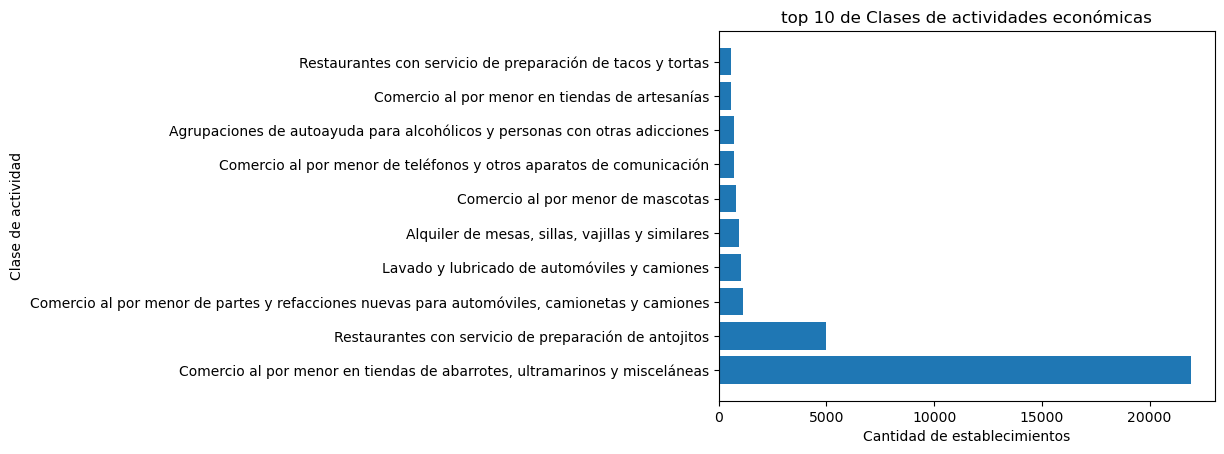

In [86]:
#Graficando los 10 tipos de actividad economica de mexico 
plt.barh(CA_mexico.index, CA_mexico.values)
plt.ylabel('Clase de actividad')
plt.xlabel('Cantidad de establecimientos')
plt.title('top 10 de Clases de actividades económicas')
plt.show()

### Actividad 2

Seleccionar dos entidades y hacer comparativos sobre la clase de actividad economica

1. Obtener el token del inegi
2. Hacer la llamada a la api, haciendo una consulta al endpoint BuscarEntidad, con los datos necesarios (numero del estado, registro de inicio, registro final, token) para cada estado
3. Transformar las respuestas a dos dataframes
4. Unir los dataframes usando la funcion concat (https://pandas.pydata.org/docs/reference/api/pandas.concat.html)
5. Separar la columna ubicacion en 3 columnas (localidad, municipio, estado)
6. Hacer la comparacion sobre la clase de actividad economica entre los dos estados



# Actividad 2

In [87]:
# Extrallendo datos de la entidad de Mexico del api
url='https://www.inegi.org.mx/app/api/denue/v1/consulta/BuscarEntidad/todos/15/0/50000/ba9e763c-9e67-4ece-a878-1df34a4d0e0f?type=json'
response= requests.get(url)

if response.status_code==200:
    content= json.loads(response.content)
mexico= pd.DataFrame(content)
# Extraendo datos de la entidad de Oaxaca
url='https://www.inegi.org.mx/app/api/denue/v1/consulta/BuscarEntidad/todos/20/0/50000/ba9e763c-9e67-4ece-a878-1df34a4d0e0f?type=json'
response= requests.get(url)

if response.status_code==200:
    content= json.loads(response.content)
oaxaca= pd.DataFrame(content)

In [88]:
#Corroorando datos de mexico
mexico.head()

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Ubicacion,Telefono,Correo_e,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local
0,15122463310001641000007837S8,8737879,ADIKK CONVERSE CHALCO,ADICTT SS SA DE CV,Comercio al por menor de calzado,0 a 5 personas,BOULEVARD,CERRADA,370,0,...,"XICO, Valle de Chalco Solidaridad, MÉXICO ...",,BOUTIQUECHALCO@CONVERSE.COM.MX,WWW.CONVERSE.COM,Fijo,-98.95279876,19.30190282,CENTRO Y PLAZA COMERCIAL,PATIO VALLE DE CHALCO,1
1,15051463211002862000002374S0,6882834,ALDO CONTI NO 147 LERMA II,27 MICRAS INTERNACIONAL SA DE CV,"Comercio al por menor de ropa, excepto de bebé...",6 a 10 personas,CARRETERA,MÉXICO-TOLUCA,0,0,...,"LERMA DE VILLADA, Lerma, MÉXICO ...",,NMENDOZA@ALDOCONTI.COM,ALDOCONTI.COM,Fijo,-99.50063556,19.28410170,,,
2,15104431160000115002004530S0,6352174,CEDIS ATIZAPAN ESTADO DE MEXICO,COMERCIALIZADORA DE LACTEOS Y DERIVADOS SA DE CV,Comercio al por mayor de leche y otros product...,51 a 100 personas,CIRCUITO,VÍA GUSTAVO BAZ,18,0,...,"TLALNEPANTLA, Tlalnepantla de Baz, MÉXICO ...",,EDGAR.SALINAS@GRUPOLALA.COM,WWW.GRUPOLALA.COM,Fijo,-99.20320817,19.57691494,ZONA INDUSTRIAL,ZONA INDUSTRIAL BARRIENTOS,
3,15081561110000092000000000S8,9330549,CREDICONFIA P.V. TECAMAC,DESARROLLADORA E IMPULSORA DE NEGOCIOS SA DE C...,Servicios de administración de negocios,6 a 10 personas,CALLE,AV FELIPE VILLANUEVA,34,,...,"TECÁMAC DE FELIPE VILLANUEVA, Tecámac, MÉXICO ...",5536716661,aguzman@crediconfia.com,https://crediconfia.com/,Fijo,-98.97129342,19.71128928,,,
4,15104466111001511000002540S0,6348437,EL MOLINITO,GRUPO COMERCIAL ATLAS SA DE CV,Comercio al por menor de muebles para el hogar,0 a 5 personas,AVENIDA,Vía Gustavo Baz,35,0,...,"TLALNEPANTLA, Tlalnepantla de Baz, MÉXICO ...",,,WWW.TIENDASATLAS.COM,Fijo,-99.20370003,19.55885646,,,LOCAL 4


In [89]:
#Corroborando datos de Oaxaca
oaxaca.head()

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Ubicacion,Telefono,Correo_e,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local
0,20397236221000022001000000U8,6148475,"""",PROYECTOS Y CONSTRUCCIONES DE TLAXIACO SA DE CV,Edificación de inmuebles comerciales y de serv...,0 a 5 personas,CALLE,MORELOS,36,,...,"HEROICA CIUDAD DE TLAXIACO, Heroica Ciudad de ...",,PROCOT@HOTMAIL.COM,,Fijo,-97.68137968,17.26468717,,,
1,20059485210000182000016064M7,6160258,"""",AUTOTRANSPORTES MIAHUATECOS SA DE CV,Transporte colectivo foráneo de pasajeros de r...,51 a 100 personas,CALLE,5 DE FEBRERO,203,,...,"MIAHUATLÁN DE PORFIRIO DÍAZ, Miahuatlán de Por...",9511875512,SUBURBANMIAHUATECOS@HOTMAIL.COM,,Fijo,-96.59711412,16.32973034,,,
2,20184931210000303000000000U5,3107621,01 JUNTA DISTRITAL EJECUTIVA DEL INE EN EL EST...,JUNTA LOCAL EJECUTIVA EN EL ESTADO DE OAXACA,Administración pública en general,11 a 30 personas,AVENIDA,INDEPENDENCIA,1782,,...,"SAN JUAN BAUTISTA TUXTEPEC, San Juan Bautista ...",,,,Fijo,-96.13704348,18.08338654,,,
3,20067722412002621000000000U0,7778539,0392 CERVECERIA,,"Bares, cantinas y similares",0 a 5 personas,PRIVADA,PRIVADA DE LAS CASAS,218,0,...,"OAXACA DE JUÁREZ, Oaxaca de Juárez, OAXACA",,,,Fijo,-96.73193317,17.05955023,,,
4,20079312112000291000000000U1,9008889,0SMOPURIFICADORA LA CRUCECITA,,Purificación y embotellado de agua,0 a 5 personas,AVENIDA,MONTE ALBAN,6,,...,"SALINA CRUZ, Salina Cruz, OAXACA",9717155448,,,Fijo,-95.19197094,16.20381998,,,


In [90]:
#uniendo los datos de mexico y oaxaca 
entidades=pd.concat([mexico,oaxaca])
entidades

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Ubicacion,Telefono,Correo_e,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local
0,15122463310001641000007837S8,8737879,ADIKK CONVERSE CHALCO,ADICTT SS SA DE CV,Comercio al por menor de calzado,0 a 5 personas,BOULEVARD,CERRADA,370,0,...,"XICO, Valle de Chalco Solidaridad, MÉXICO ...",,BOUTIQUECHALCO@CONVERSE.COM.MX,WWW.CONVERSE.COM,Fijo,-98.95279876,19.30190282,CENTRO Y PLAZA COMERCIAL,PATIO VALLE DE CHALCO,1
1,15051463211002862000002374S0,6882834,ALDO CONTI NO 147 LERMA II,27 MICRAS INTERNACIONAL SA DE CV,"Comercio al por menor de ropa, excepto de bebé...",6 a 10 personas,CARRETERA,MÉXICO-TOLUCA,0,0,...,"LERMA DE VILLADA, Lerma, MÉXICO ...",,NMENDOZA@ALDOCONTI.COM,ALDOCONTI.COM,Fijo,-99.50063556,19.28410170,,,
2,15104431160000115002004530S0,6352174,CEDIS ATIZAPAN ESTADO DE MEXICO,COMERCIALIZADORA DE LACTEOS Y DERIVADOS SA DE CV,Comercio al por mayor de leche y otros product...,51 a 100 personas,CIRCUITO,VÍA GUSTAVO BAZ,18,0,...,"TLALNEPANTLA, Tlalnepantla de Baz, MÉXICO ...",,EDGAR.SALINAS@GRUPOLALA.COM,WWW.GRUPOLALA.COM,Fijo,-99.20320817,19.57691494,ZONA INDUSTRIAL,ZONA INDUSTRIAL BARRIENTOS,
3,15081561110000092000000000S8,9330549,CREDICONFIA P.V. TECAMAC,DESARROLLADORA E IMPULSORA DE NEGOCIOS SA DE C...,Servicios de administración de negocios,6 a 10 personas,CALLE,AV FELIPE VILLANUEVA,34,,...,"TECÁMAC DE FELIPE VILLANUEVA, Tecámac, MÉXICO ...",5536716661,aguzman@crediconfia.com,https://crediconfia.com/,Fijo,-98.97129342,19.71128928,,,
4,15104466111001511000002540S0,6348437,EL MOLINITO,GRUPO COMERCIAL ATLAS SA DE CV,Comercio al por menor de muebles para el hogar,0 a 5 personas,AVENIDA,Vía Gustavo Baz,35,0,...,"TLALNEPANTLA, Tlalnepantla de Baz, MÉXICO ...",,,WWW.TIENDASATLAS.COM,Fijo,-99.20370003,19.55885646,,,LOCAL 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,20318722518000291000000000U5,8063068,COCINA ECONOMICA PATTY,,Restaurantes que preparan otro tipo de aliment...,0 a 5 personas,CALLE,QUINTA SUR,,,...,"PUERTO ESCONDIDO, San Pedro Mixtepec -Dto. 22 ...",,,,Fijo,-97.06970135,15.85815624,,,
49996,20067722518001281000000000U8,3115968,COCINA ECONOMICA PATY,,Restaurantes que preparan otro tipo de aliment...,0 a 5 personas,AVENIDA,PINOS,101,,...,"OAXACA DE JUÁREZ, Oaxaca de Juárez, OAXACA",,,,Fijo,-96.76525520,17.12097878,,,
49997,20184722212000871000000000U0,3084219,COCINA ECONÓMICA PATY,,Restaurantes que preparan otro tipo de aliment...,0 a 5 personas,BOULEVARD,MANUEL AVILA CAMACHO,841,0,...,"SAN JUAN BAUTISTA TUXTEPEC, San Juan Bautista ...",2871011151,,,Fijo,-96.12810985,18.09299125,,,
49998,20184722518000461000000000U0,8862496,COCINA ECONOMICA PEPITO EXPRESS,,Restaurantes que preparan otro tipo de aliment...,0 a 5 personas,CALLE,VICENTE GUERRERO,438,0,...,"SAN JUAN BAUTISTA TUXTEPEC, San Juan Bautista ...",2871811928,,,Fijo,-96.11752373,18.08414856,,,


In [91]:
#dividiendo la columna ubicacion en las 3 columnas Localidad, Municipio y Estado
ubicacion=['Localidad','Municipio','Estado']
entidades[ubicacion]=entidades.Ubicacion.str.split(',', expand=True,n=2)
entidades.drop(['Ubicacion'], axis=1, inplace=True)
entidades

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local,Localidad,Municipio,Estado
0,15122463310001641000007837S8,8737879,ADIKK CONVERSE CHALCO,ADICTT SS SA DE CV,Comercio al por menor de calzado,0 a 5 personas,BOULEVARD,CERRADA,370,0,...,WWW.CONVERSE.COM,Fijo,-98.95279876,19.30190282,CENTRO Y PLAZA COMERCIAL,PATIO VALLE DE CHALCO,1,XICO,Valle de Chalco Solidaridad,MÉXICO
1,15051463211002862000002374S0,6882834,ALDO CONTI NO 147 LERMA II,27 MICRAS INTERNACIONAL SA DE CV,"Comercio al por menor de ropa, excepto de bebé...",6 a 10 personas,CARRETERA,MÉXICO-TOLUCA,0,0,...,ALDOCONTI.COM,Fijo,-99.50063556,19.28410170,,,,LERMA DE VILLADA,Lerma,MÉXICO
2,15104431160000115002004530S0,6352174,CEDIS ATIZAPAN ESTADO DE MEXICO,COMERCIALIZADORA DE LACTEOS Y DERIVADOS SA DE CV,Comercio al por mayor de leche y otros product...,51 a 100 personas,CIRCUITO,VÍA GUSTAVO BAZ,18,0,...,WWW.GRUPOLALA.COM,Fijo,-99.20320817,19.57691494,ZONA INDUSTRIAL,ZONA INDUSTRIAL BARRIENTOS,,TLALNEPANTLA,Tlalnepantla de Baz,MÉXICO
3,15081561110000092000000000S8,9330549,CREDICONFIA P.V. TECAMAC,DESARROLLADORA E IMPULSORA DE NEGOCIOS SA DE C...,Servicios de administración de negocios,6 a 10 personas,CALLE,AV FELIPE VILLANUEVA,34,,...,https://crediconfia.com/,Fijo,-98.97129342,19.71128928,,,,TECÁMAC DE FELIPE VILLANUEVA,Tecámac,MÉXICO
4,15104466111001511000002540S0,6348437,EL MOLINITO,GRUPO COMERCIAL ATLAS SA DE CV,Comercio al por menor de muebles para el hogar,0 a 5 personas,AVENIDA,Vía Gustavo Baz,35,0,...,WWW.TIENDASATLAS.COM,Fijo,-99.20370003,19.55885646,,,LOCAL 4,TLALNEPANTLA,Tlalnepantla de Baz,MÉXICO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,20318722518000291000000000U5,8063068,COCINA ECONOMICA PATTY,,Restaurantes que preparan otro tipo de aliment...,0 a 5 personas,CALLE,QUINTA SUR,,,...,,Fijo,-97.06970135,15.85815624,,,,PUERTO ESCONDIDO,San Pedro Mixtepec -Dto. 22 -,OAXACA
49996,20067722518001281000000000U8,3115968,COCINA ECONOMICA PATY,,Restaurantes que preparan otro tipo de aliment...,0 a 5 personas,AVENIDA,PINOS,101,,...,,Fijo,-96.76525520,17.12097878,,,,OAXACA DE JUÁREZ,Oaxaca de Juárez,OAXACA
49997,20184722212000871000000000U0,3084219,COCINA ECONÓMICA PATY,,Restaurantes que preparan otro tipo de aliment...,0 a 5 personas,BOULEVARD,MANUEL AVILA CAMACHO,841,0,...,,Fijo,-96.12810985,18.09299125,,,,SAN JUAN BAUTISTA TUXTEPEC,San Juan Bautista Tuxtepec,OAXACA
49998,20184722518000461000000000U0,8862496,COCINA ECONOMICA PEPITO EXPRESS,,Restaurantes que preparan otro tipo de aliment...,0 a 5 personas,CALLE,VICENTE GUERRERO,438,0,...,,Fijo,-96.11752373,18.08414856,,,,SAN JUAN BAUTISTA TUXTEPEC,San Juan Bautista Tuxtepec,OAXACA


In [92]:
#corroborando que las columnas 
entidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   CLEE                      100000 non-null  object
 1   Id                        100000 non-null  object
 2   Nombre                    100000 non-null  object
 3   Razon_social              100000 non-null  object
 4   Clase_actividad           100000 non-null  object
 5   Estrato                   100000 non-null  object
 6   Tipo_vialidad             100000 non-null  object
 7   Calle                     100000 non-null  object
 8   Num_Exterior              100000 non-null  object
 9   Num_Interior              100000 non-null  object
 10  Colonia                   100000 non-null  object
 11  CP                        100000 non-null  object
 12  Telefono                  100000 non-null  object
 13  Correo_e                  100000 non-null  object
 14  Sitio

In [93]:
#Entiendo la estructura de los datos
entidades.describe()

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local,Localidad,Municipio,Estado
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,100000,56092,7513,739,7,25,13035,1474,575,...,1393,2,94336,94325,15,1233,1413,1600,694,3
top,15122463310001641000007837S8,8737879,ABARROTES SIN NOMBRE,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,NINGUNO,,,...,,Fijo,-95.19224698,17.05951500,,,,ECATEPEC DE MORELOS,Ecatepec de Morelos,MÉXICO
freq,1,1,2584,87157,31683,92414,67347,7612,39606,64577,...,97511,96863,73,73,93988,93985,94247,7201,7201,50000


In [94]:
#obteniendo los 10 tipos de actividad economica de mexico
CA_mexico=entidades['Clase_actividad'].get(entidades['Estado'].str.contains('MÉXICO')).value_counts()
CA_mexico=CA_mexico.head(10)
CA_mexico

Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas                       21926
Restaurantes con servicio de preparación de antojitos                                            4990
Comercio al por menor de partes y refacciones nuevas para automóviles, camionetas y camiones     1107
Lavado y lubricado de automóviles y camiones                                                     1049
Alquiler de mesas, sillas, vajillas y similares                                                   954
Comercio al por menor de mascotas                                                                 813
Comercio al por menor de teléfonos y otros aparatos de comunicación                               712
Agrupaciones de autoayuda para alcohólicos y personas con otras adicciones                        694
Comercio al por menor en tiendas de artesanías                                                    565
Restaurantes con servicio de preparación de tacos y tortas                        

In [95]:
#obteniendo los 10 tipos de actividad economica de oaxaca
CA_oaxaca=entidades['Clase_actividad'].get(entidades['Estado'].str.contains('OAXACA')).value_counts()
CA_oaxaca=CA_oaxaca.head(10)
CA_oaxaca

Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas                                          9757
Restaurantes con servicio de preparación de antojitos                                                              3050
Comercio al por menor de carnes rojas                                                                              2789
Confección, bordado y deshilado de productos textiles                                                              2559
Bares, cantinas y similares                                                                                        1640
Fabricación de productos de herrería                                                                               1538
Servicios de acceso a computadoras                                                                                 1464
Asociaciones y organizaciones religiosas                                                                           1386
Fabricación de muebles, excepto cocinas 

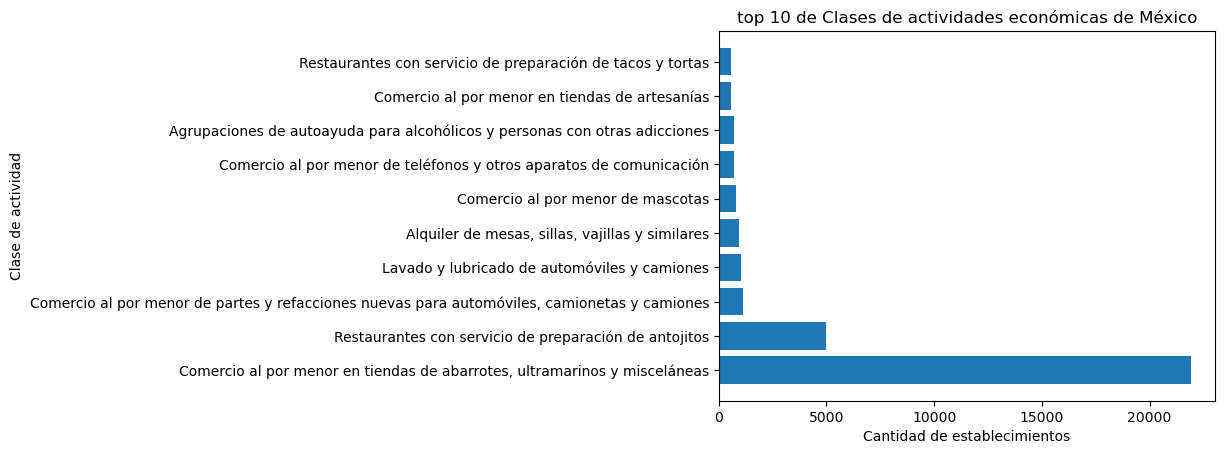

In [96]:
#graficanco los 10 tipos de actividad economica de mexico
plt.barh(CA_mexico.index, CA_mexico.values)
plt.ylabel('Clase de actividad')
plt.xlabel('Cantidad de establecimientos')
plt.title('top 10 de Clases de actividades económicas de México')
plt.show()

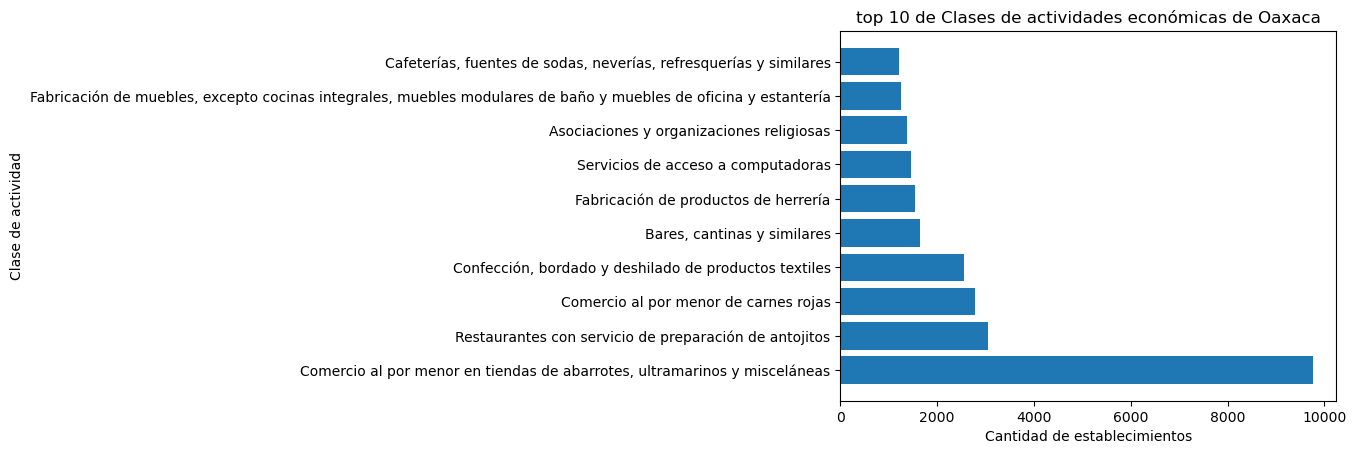

In [97]:
#Graficando los 10 tipos de actividad economica de oaxaca
plt.barh(CA_oaxaca.index, CA_oaxaca.values)
plt.ylabel('Clase de actividad')
plt.xlabel('Cantidad de establecimientos')
plt.title('top 10 de Clases de actividades económicas de Oaxaca')
plt.show()

## conclusiones
- La actividad economica con mas uso es el comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas esto pasa tanto en México como en Oaxaca con mayor presentacion en Mexico.
- Los restaurantes con servicio de preparación de antojitos son mas comunes en Mexico que en Oaxaca 
- Ambas actividades economicas mas usadas son de necesidad basica por lo que es normal que sean las mas usadas en ambos estados
- En Oaxaca la variedad de actividades economicas es mas amplia que en Mexico
- En mexico los comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas superan por mucho a las demas actividades economicas esto puede deberse a que son de las actividades economicas mas estables y faciles de iniciar